# Predictive Analytics of Healthcare Data using Machine Learning Approaches.

##By GLORIOUS MWIKALI

##SEPTEMBER 2025.




In [1]:
#1.import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler,LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

sns.set(style="whitegrid")

In [2]:
# 2.load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#0verview
df = pd.read_csv('/content/healthcare_dataset.csv', engine='python', on_bad_lines='skip')
print("rows,columns:", df.shape)
display(df.head())
df.info()
df.describe(include='all')

rows,columns: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [4]:
!ls /content/

drive  healthcare_dataset.csv  sample_data


In [5]:
#target selection
print("columns:",df.columns.tolist())
target_col = 'Test Results' # Explicitly setting the target column
print("Selected target:",target_col)

if target_col not in df.columns:
  raise ValueError(f"Target column '{target_col}' not found in the DataFrame.")

columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']
Selected target: Test Results


In [6]:
#check for missing values
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [7]:
#fill missing values
df.fillna(df.mean(numeric_only=True))

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [8]:
#3 preprocess
#class distribution
print("class distribution:\n",df[target_col].value_counts(normalize=False))

class distribution:
 Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


In [9]:
#split features and target
X=df.drop(columns=[target_col])
y=df[target_col].copy()

In [10]:
#identify numeric vs categoric features
num_cols=X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=X.select_dtypes(include=['object','category','bool']).columns.tolist()
print("numeric columns:",num_cols)
print("categorical columns:",cat_cols)


numeric columns: ['Age', 'Billing Amount', 'Room Number']
categorical columns: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication']


In [11]:
# Identify numerical and categorical columns (excluding the target, which is already separated)
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['Age', 'Billing Amount', 'Room Number']
Categorical columns: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication']


In [12]:
#impute numeric
num_imputer=SimpleImputer(strategy='median')
X_num_=pd.DataFrame(num_imputer.fit_transform(X[num_cols]),columns=num_cols)

In [13]:
if len(cat_cols) > 0:
  X_cat_=X[cat_cols].fillna('missing').astype(str)
  enc=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
  X_cat_enc=pd.DataFrame(enc.fit_transform(X_cat_),columns=cat_cols)
else:
  X_cat_enc=pd.DataFrame(index=X_num_.index)

In [15]:
#combine
X_pre=pd.concat([X_num_,X_cat_enc],axis=1)

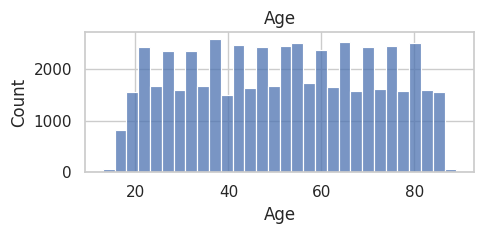

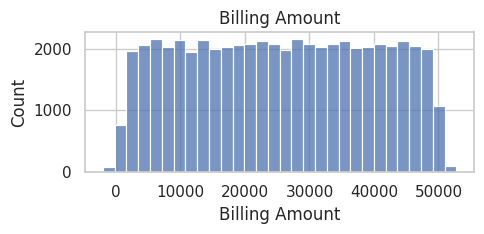

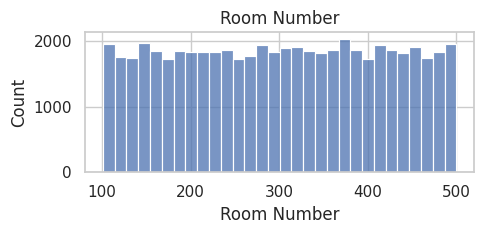

In [19]:
#visualization- histogram for numerical features
for col in num_cols[:5]:
  plt.figure(figsize=(5,2.5))
  sns.histplot(X[col].dropna(),bins=30)
  plt.title(col)
  plt.tight_layout()
  plt.show()

In [20]:
# Scale numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])
X_processed= pd.DataFrame(X_num_scaled, columns=num_cols)
display(X_processed.head())

,Age,Billing Amount,Room Number
0,-1.098824,-0.470261,0.233120
1,0.533639,0.570250,-0.313556
2,1.247842,0.169990,-0.834199
3,-1.200853,0.870465,1.291761
4,-0.435636,-0.795211,1.361180


In [21]:
#train/test split
y = y.fillna('missing') # Fill missing values in the target variable
X_train,X_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.2, random_state=42)
print("train/test shapes:",X_train.shape , X_test.shape)

train/test shapes: (44400, 3) (11100, 3)


In [22]:
#feature selection
selector=SelectKBest(score_func=f_classif,k=min(12,X_train.shape[1]))
selector.fit(X_train,y_train)
sel_mask=selector.get_support()
selected_features=X_train.columns[sel_mask].tolist()
print("selected features:",selected_features)
#keep only selected features
x_train_sel=X_train[selected_features]
x_test_sel=X_test[selected_features]

selected features: ['Age', 'Billing Amount', 'Room Number']


In [23]:
#model comparison with cv
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
models={
    'LogisticRegression':LogisticRegression(max_iter=5000,class_weight="balanced"),
    'RandomForestClassifier':RandomForestClassifier(random_state=42,class_weight="balanced"),
    'SVC':SVC(probability=True)
}
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring=['accuracy','precision_macro','recall_macro','f1_macro']
cv_results={}
for name,model in models.items():
  scores=cross_validate(model,x_train_sel,y_train,cv=skf,scoring=scoring,n_jobs=-1)
  cv_results[name]={metric:np.mean(scores[f'test_{metric}'])for metric in scoring}
  print(f"{name}: {cv_results[name]}")

LogisticRegression: {'accuracy': np.float64(0.33328828828828827), 'precision_macro': np.float64(0.33347622404714933), 'recall_macro': np.float64(0.3336734896511029), 'f1_macro': np.float64(0.318617993242918)}
RandomForestClassifier: {'accuracy': np.float64(0.36718468468468474), 'precision_macro': np.float64(0.3672064613899505), 'recall_macro': np.float64(0.3671608752167854), 'f1_macro': np.float64(0.36713951251697174)}
SVC: {'accuracy': np.float64(0.33409909909909913), 'precision_macro': np.float64(0.3336983479923462), 'recall_macro': np.float64(0.33400433956904363), 'f1_macro': np.float64(0.3297968286654894)}


In [24]:
#choose the best model by f1_macro
best_model_name=max(cv_results,key=lambda k:cv_results[k]['f1_macro'])
print("best model by cv f1:",best_model_name)
best_model=models[best_model_name]
best_model.fit(x_train_sel,y_train)

best model by cv f1: RandomForestClassifier


RandomForestClassifier(class_weight='balanced', random_state=42)

In [25]:
#evaluate
y_pred=best_model.predict(x_test_sel)
if hasattr(best_model, 'predict_proba'):
  y_proba=best_model.predict_proba(x_test_sel)[:,1] if y_train.nunique()==2 else None # Corrected syntax for y_proba
else:
  y_proba=None

print("test classification report:")
print(classification_report(y_test,y_pred))
print("confusion matrix:/n",confusion_matrix(y_test,y_pred))

test classification report:
              precision    recall  f1-score   support

    Abnormal       0.38      0.38      0.38      3754
Inconclusive       0.37      0.37      0.37      3617
      Normal       0.37      0.37      0.37      3729

    accuracy                           0.37     11100
   macro avg       0.37      0.37      0.37     11100
weighted avg       0.37      0.37      0.37     11100

confusion matrix:/n [[1426 1137 1191]
 [1164 1346 1107]
 [1210 1146 1373]]


In [30]:
#hyperparameter tuning
param_grid={
  'n_estimators':[100,200],
  'max_depth':[None, 10, 20],
  'min_samples_split':[2,5]
}
grid_search=GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"),param_grid,cv=skf,scoring='f1_macro',n_jobs=-1)
grid_search.fit(x_train_sel,y_train)
print("Grid best params:",grid_search.best_params_,"best cv f1:", grid_search.best_score_)

best_rf=grid_search.best_estimator_
from sklearn.metrics import f1_score # Import f1_score
y_pred_rf=best_rf.predict(x_test_sel)
print("tuned RF test f1:", f1_score(y_test,y_pred_rf,average='macro'))

Grid best params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100} best cv f1: 0.3707071716837112
tuned RF test f1: 0.369849837442578


In [31]:
from sklearn.metrics import auc  # or use roc_auc_score

if y.nunique() == 2 and y_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


In [32]:
#save
import joblib # Import joblib
joblib.dump({'model':best_rf, 'features': selected_features, 'scaler':scaler,'num_imputer':num_imputer, 'cat_encoder' :enc if len(cat_cols)>0 else None},'healthcare_model_artifacts.pkl')
print("saved healcare_model_artifacts.pkl")

saved healcare_model_artifacts.pkl
